# Taller 2 - Filtros

Alejandra Arias Torres  
Leonardo Fabio Mercado

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
from scipy.signal import convolve2d as conv2
from scipy import ndimage, misc
from skimage import data, io, filters

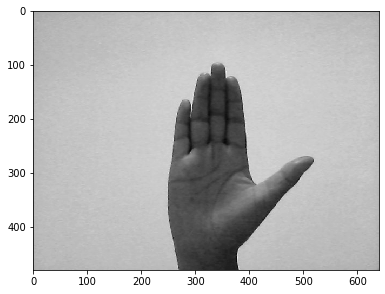

In [18]:
img = cv2.imread('Fig/mano.jpg',0)
#VISUALIZACION
plt.figure(1)
plt.plot,plt.imshow(img,cmap = 'gray')
plt.subplots_adjust(left = 0.125, right = 1 ,  bottom = 0.1, top = 1 , wspace = 0.2, hspace = 0.2 )

# Redimensionamiento

<Figure size 432x288 with 0 Axes>

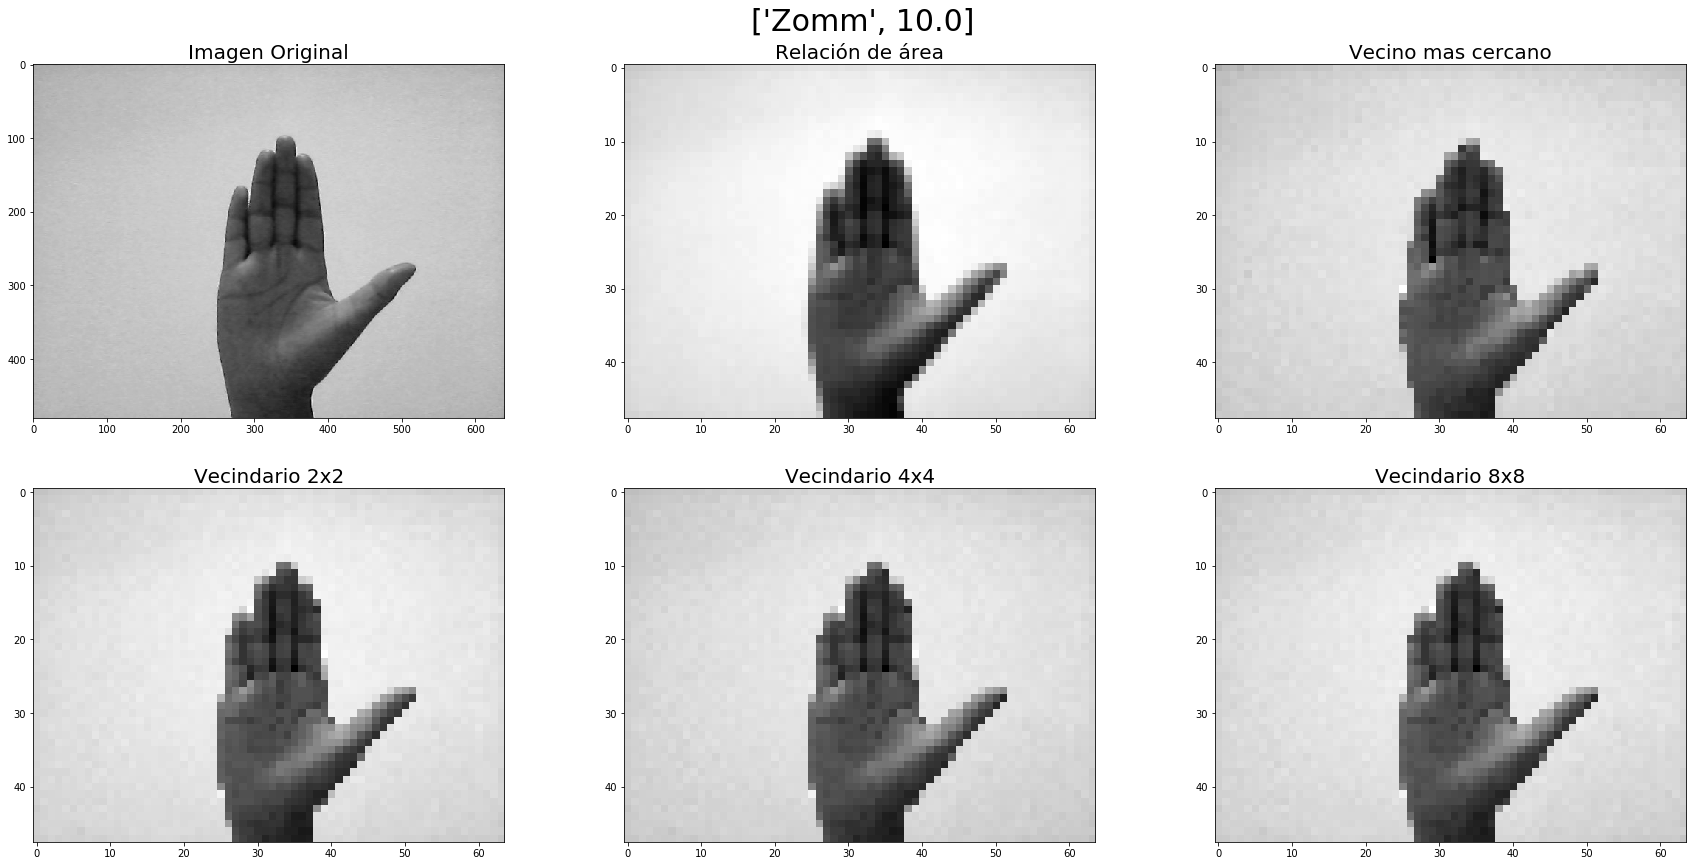

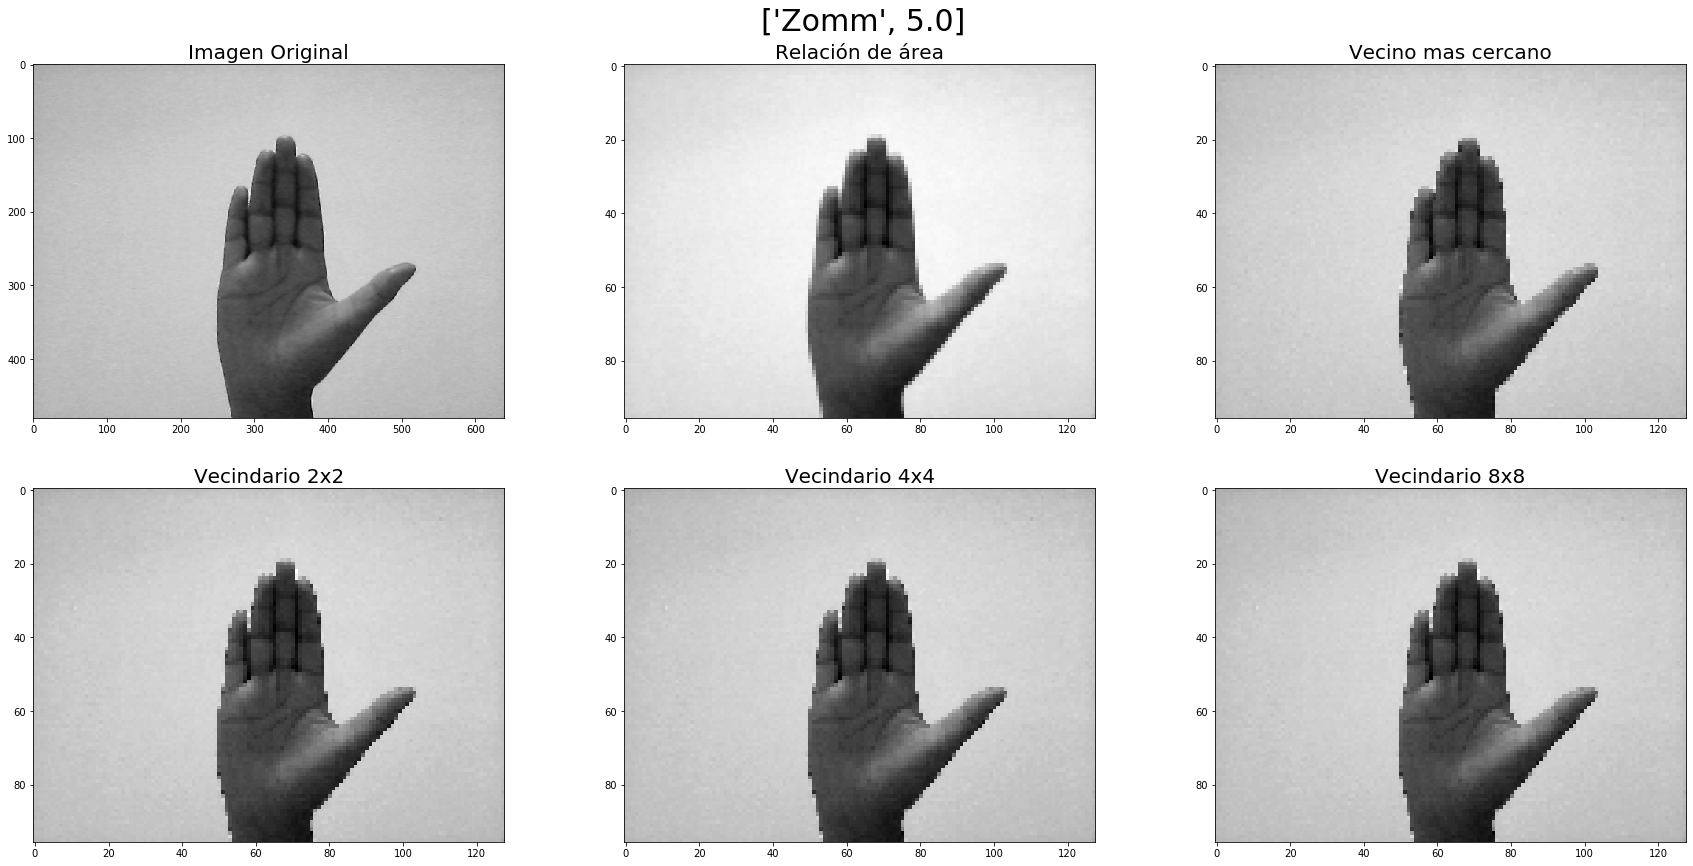

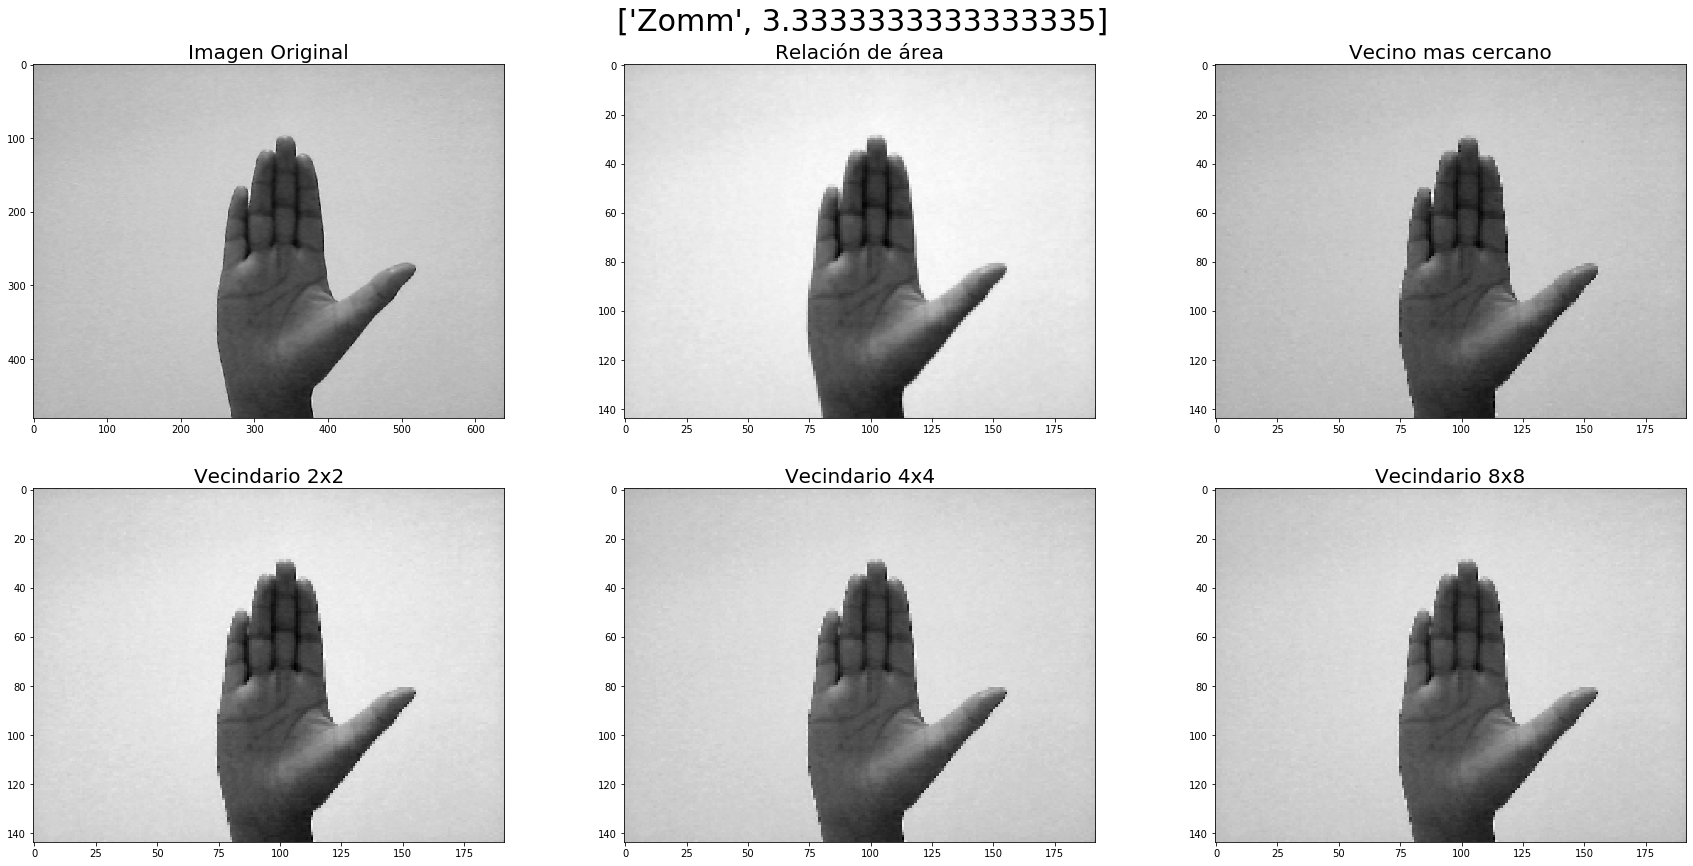

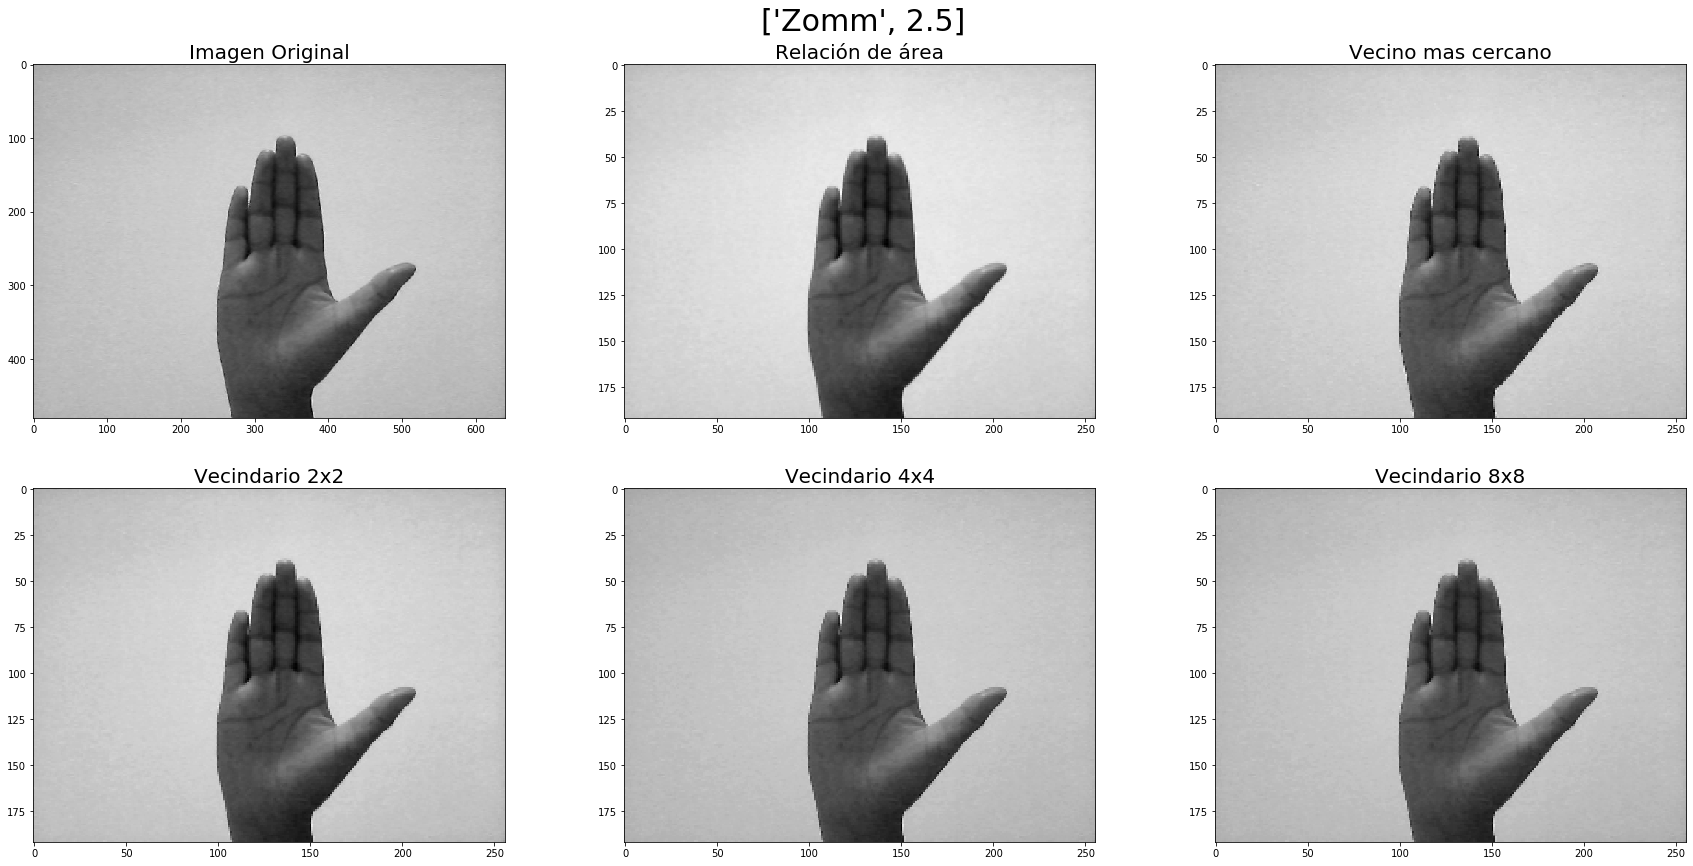

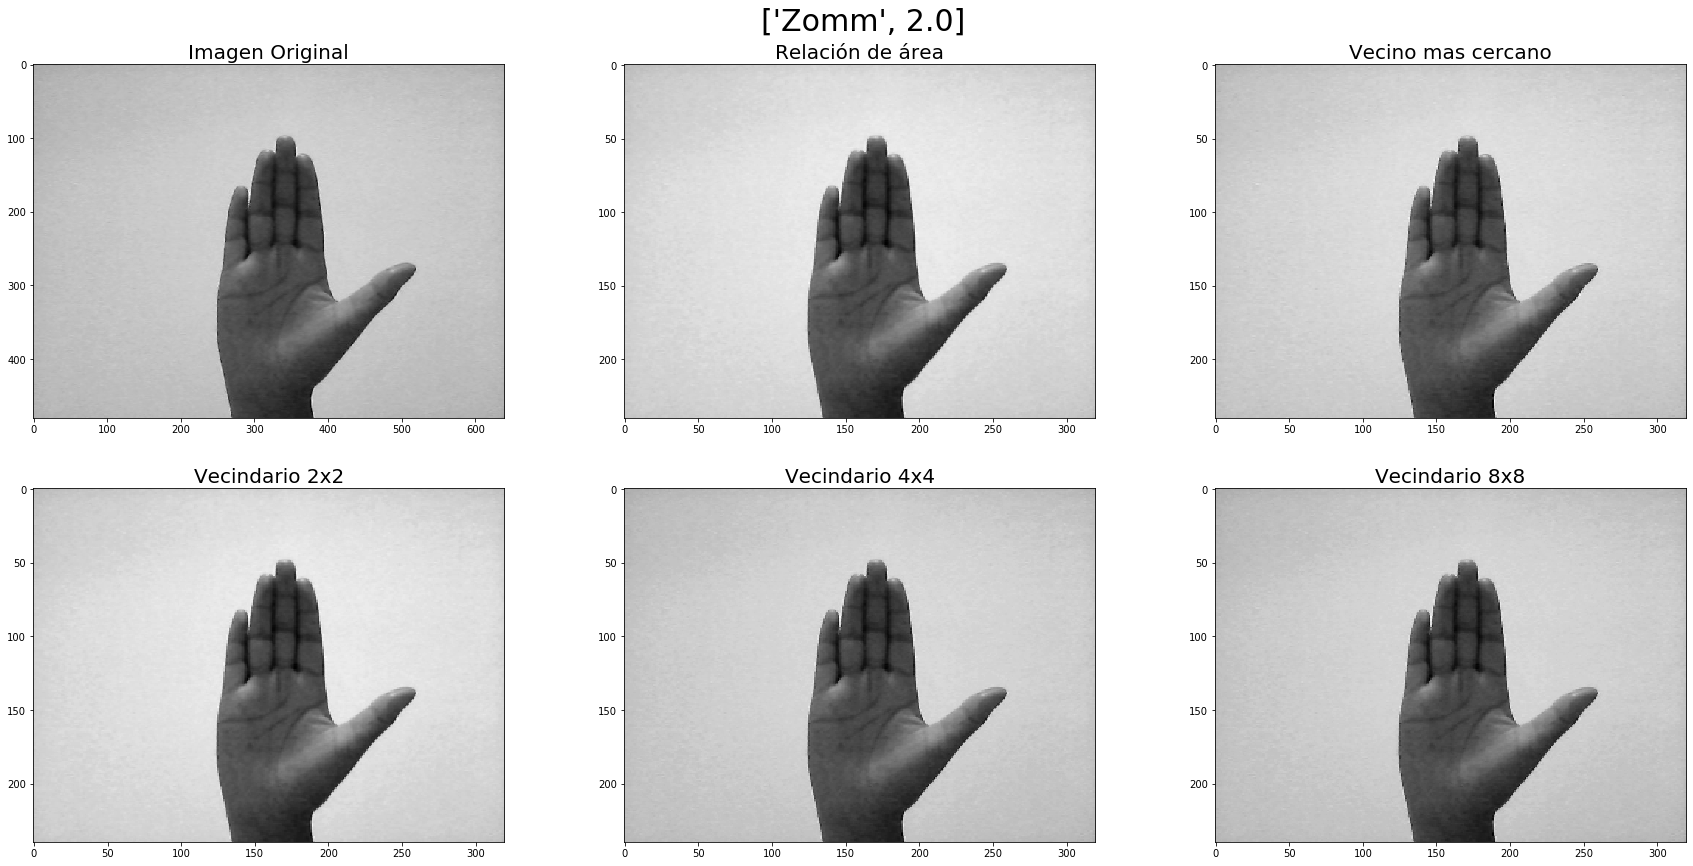

In [20]:
for i in range(1,6):
    scale_percentx = 10.0*i # percent of original size
    scale_percenty = 10.0*i # percent of original size    
    width = int(img.shape[1] * scale_percentx / 100)
    height = int(img.shape[0] * scale_percenty / 100)
    dim = (width, height)
    # resize image
    ImgRes1 = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) #Mestreo utilizando relación de área
    ImgRes2 = cv2.resize(img, dim, interpolation = cv2.INTER_NEAREST) #Interpolación con el vecino mas cercano
    ImgRes3 = cv2.resize(img, dim, interpolation = cv2.INTER_LINEAR) #Interpolación bilineal
    ImgRes4 = cv2.resize(img, dim, interpolation = cv2.INTER_CUBIC) #Interpolación bicúbica vecindario 4x4
    ImgRes5 = cv2.resize(img, dim, interpolation = cv2.INTER_LANCZOS4) #Interpolación Lacnzos vecindario 8x8
    plt.figure(i)
    fig, ax = plt.subplots();
    fig.suptitle(['Zomm', 10/i] , fontsize=30, x=2.07, y=3.2);
    plt.subplot(2,3,1),plt.imshow(img,cmap = 'gray'), plt.title('Imagen Original',fontsize=20)
    plt.subplot(2,3,2),plt.imshow(ImgRes1,cmap = 'gray'), plt.title('Relación de área',fontsize=20);
    plt.subplot(2,3,3),plt.imshow(ImgRes2,cmap = 'gray'), plt.title('Vecino mas cercano',fontsize=20);
    plt.subplot(2,3,4),plt.imshow(ImgRes3,cmap = 'gray'), plt.title('Vecindario 2x2',fontsize=20);
    plt.subplot(2,3,5),plt.imshow(ImgRes4,cmap = 'gray'), plt.title('Vecindario 4x4',fontsize=20);
    plt.subplot(2,3,6),plt.imshow(ImgRes5,cmap = 'gray'), plt.title('Vecindario 8x8',fontsize=20);
    plt.subplots_adjust(left = 0.125, right = 4 ,  bottom = 0.3, top =3 , wspace = 0.2, hspace = 0.2 )


##### Se observa que la imagen resultante del muestreo por relación de área presenta menor calidad, al hacer un acercamiento x10, en los detalles y contornos respecto a los demás tipos de interpolación; sin embargo, ya para un acercamiento de 5 veces se hace mas evidente la efectividad de este tipo de interpolación para diferenciar regiones, presentando unos contornos de mejor calidad (mas definidos y suavizados) pero con menor calidad en los detalles, siendo menos definidas las líneas de la mano. Para las demás interpolaciones se observa como a medida que aumenta el número de vecinos involucrados en el cálculo mejora la calidad de la imagen haciendo mas definidos los detalles. 

# Espacios de color

Tamaño imgBGR565=  (480, 640, 2)
Tamaño imgBGR555=  (480, 640, 2)


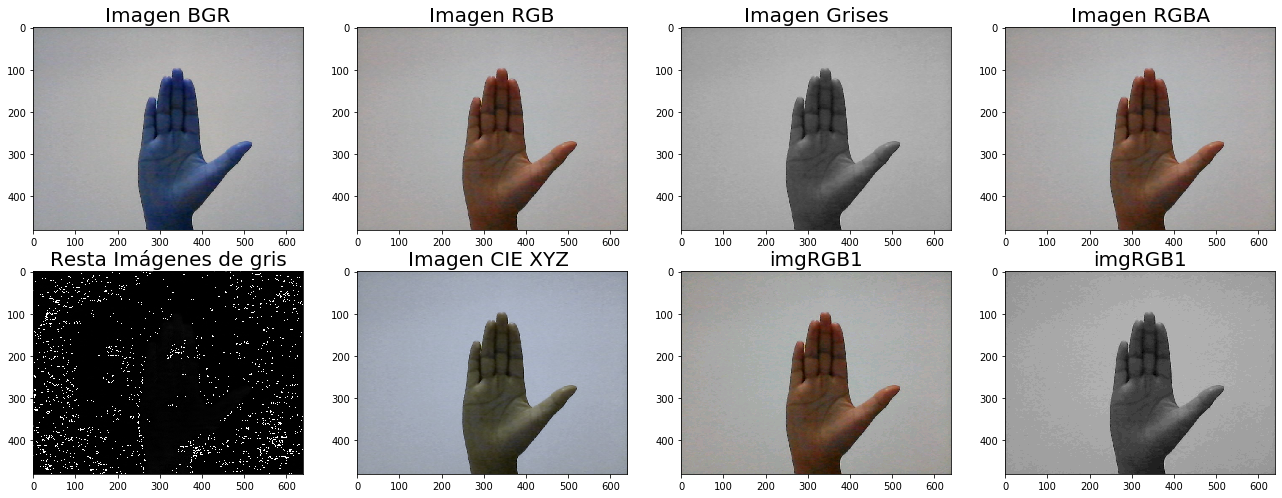

In [194]:
imgBGR = cv2.imread('Fig/mano.png',1) #Leer imagen en color sin canal alfa
imgBGRA = cv2.imread('Fig/mano.png',-1) #Leer imagen en color con canal alfa
imgGRAY1 = cv2.imread('Fig/mano.png',0) #Leer imagen en grises
imgGRAY2= cv2.cvtColor(imgBGR,cv2.COLOR_BGR2GRAY) #Transformación BGR a Grises
imgRGB = cv2.cvtColor(imgBGR,cv2.COLOR_BGR2RGB) #Transformación BGR a RGB
imgRGBA = cv2.cvtColor(imgBGRA,cv2.COLOR_BGRA2RGBA) #Transformación RGBA a RGBA 
imgBGR565 = cv2.cvtColor(imgRGBA,cv2.COLOR_RGBA2BGR565) #Transformación RGBA a BGR565
imgRGB1 = cv2.cvtColor(imgBGR565,cv2.COLOR_BGR5652RGB) #Transformación Gris a BGR555
print('Tamaño imgBGR565= ',imgBGR565.shape)
imgBGR555 = cv2.cvtColor(imgGRAY1,cv2.COLOR_GRAY2BGR555) #Transformación Gris a BGR555
imgRGB2 = cv2.cvtColor(imgBGR555,cv2.COLOR_BGR5552RGB) #Transformación Gris a BGR555
print('Tamaño imgBGR555= ',imgBGR565.shape)
imgXYZ = cv2.cvtColor(imgRGB,cv2.COLOR_RGB2XYZ) #Transformación RGB a CIE XYZ
#VISUALIZACION
plt.figure(1)
plt.subplot(3,4,1),plt.imshow(imgBGR), plt.title('Imagen BGR',fontsize=20);
plt.subplot(3,4,2),plt.imshow(imgRGB), plt.title('Imagen RGB',fontsize=20);
plt.subplot(3,4,3),plt.imshow(imgGRAY1, cmap='gray'), plt.title('Imagen Grises',fontsize=20);
plt.subplot(3,4,4),plt.imshow(imgRGBA), plt.title('Imagen RGBA',fontsize=20);
plt.subplot(3,4,5),plt.imshow(imgGRAY1-imgGRAY2, cmap='gray'), plt.title('Resta Imágenes de gris',fontsize=20);
plt.subplot(3,4,6),plt.imshow(imgXYZ), plt.title('Imagen CIE XYZ ',fontsize=20);
plt.subplot(3,4,7),plt.imshow(imgRGB1), plt.title('imgRGB1',fontsize=20);
plt.subplot(3,4,8),plt.imshow(imgRGB2), plt.title('imgRGB1',fontsize=20);
plt.subplots_adjust(left = 0.125, right = 3 ,  bottom = 0.1, top = 2.5, wspace = 0.2, hspace = 0.2 )

##### Se verifica que las transformaciones desde diferentes espacios de color no presentan diferencias en los resultados, lo que demuestra que las operaciones no generan desfases en los cálculos intermedios. Se presentan discrepancias en el resultado de la lectura de una imagen de grises mediante la función cv2.imread y su obtención mediante la conversión desde cualquier espacio con la función cv2.cvtColor como se observa al graficar la resta entre las dos.

##### La representación en el espacio BGR565 asigna 5 bits a los colores rojo y azul y 6 bits al color verde, información que se almacena en dos matrices, la primera de las cuales contiene la información asociada a los tonos azules y verdes y la segunda a los rojos principalmente. Tanto este espacio como el espacio BGR555 requerirían menos memoria y  permitirían procesar con mayor velocidad la información, a expensas de disminuir la cantidad de colores que es posible representar.

##### El espacio de color CIE XYZ asigna a Y un valor relacionado con la luminosidad, a Z un valor asociado al estímulo de azul y a X un valor relacionado con la curva de densibilidad del rojo al verde.

# Umbralización

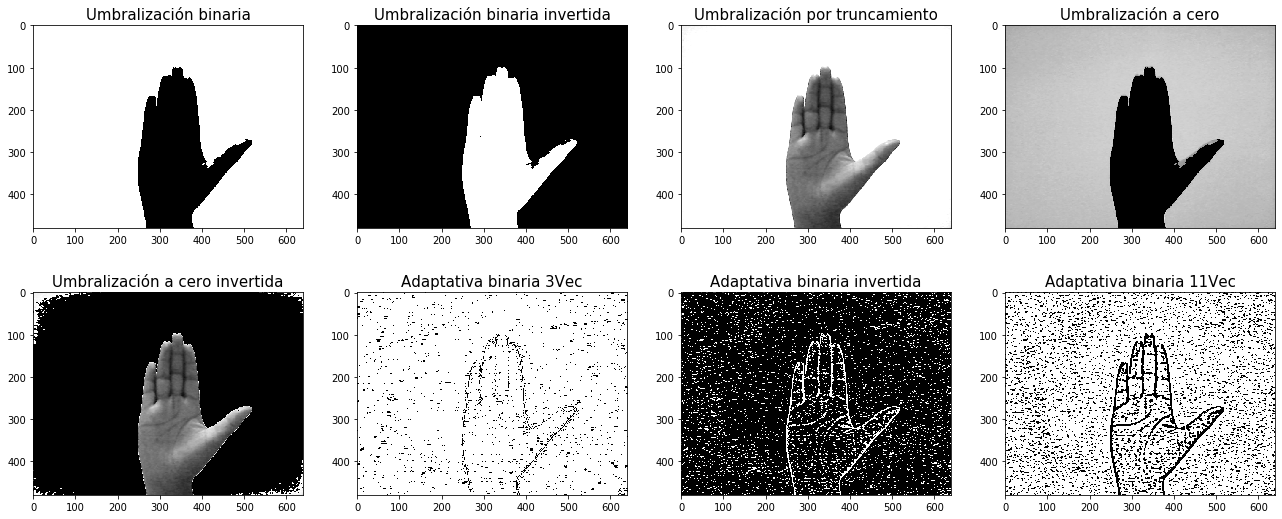

In [325]:
ret,thBi=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thBiInv=cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thTrunc=cv2.threshold(img,155,255,cv2.THRESH_TRUNC)
ret,th0=cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,th0Inv=cv2.threshold(img,155,255,cv2.THRESH_TOZERO_INV)
# Umbral Adaptativo.
thAdBiMean3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,2)
thAdBiGauss3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
thAdBiMean11 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

plt.figure(1)
plt.subplot(2,4,1),plt.imshow(thBi, cmap='gray'), plt.title('Umbralización binaria',fontsize=15);
plt.subplot(2,4,2),plt.imshow(thBiInv, cmap='gray'), plt.title('Umbralización binaria invertida',fontsize=15);
plt.subplot(2,4,3),plt.imshow(thTrunc, cmap='gray'), plt.title('Umbralización por truncamiento',fontsize=15);
plt.subplot(2,4,4),plt.imshow(th0, cmap='gray'), plt.title('Umbralización a cero',fontsize=15);
plt.subplot(2,4,5),plt.imshow(th0Inv, cmap='gray'), plt.title('Umbralización a cero invertida',fontsize=15);
plt.subplot(2,4,6),plt.imshow(thAdBiMean3, cmap='gray'), plt.title('Adaptativa binaria 3Vec',fontsize=15);
plt.subplot(2,4,7),plt.imshow(thAdBiGauss3, cmap='gray'), plt.title('Adaptativa binaria invertida',fontsize=15);
plt.subplot(2,4,8),plt.imshow(thAdBiMean11, cmap='gray'), plt.title('Adaptativa binaria 11Vec',fontsize=15);
plt.subplots_adjust(left = 0.125, right = 3 ,  bottom = 0.1, top = 1.8, wspace = 0.2, hspace = 0.2 )


##### * La umbralización binaria entrega una imagen en blanco y negro y la binaria invertida entregará, bajo los mismos parámetror, el complemento de la anterior. Como se puede observar, aplicando estas funciones, es posible extraer, seleccionando un umbral intermedio, el rasgo mas general que corresponde a la silueta de la mano.

##### * La umbralización por truncamiento, de nuevo, con un umbral intermedio, permite eliminar el fondo y mantener la información de la mano con sus detalles.

##### * Una umbralización a cero para este caso y con el umbral seleccionado sería de utilidad para extraer, de nuevo, la silueta o mantener información relevante en el fondo de la imagen. 

##### * Se evidencia la importancia de elegir correctamente el umbral, ya que con el valor de 127 se descartan pixeles que contenen información relevante de la mano, mientras que un umbral de 155 se establece con mayor exactitud el límite entre la imagen y el fondo.

##### * El umbral adaptativo permite extraer mas información, incluyendo ya no solo el contorno sino los detalles de la imagen. Se observa como el aumento en el número de vecinos mejora el desempeño, obteniendo resultados mas detallados pero permitiendo también el paso de información no relevante.

# Filtros 


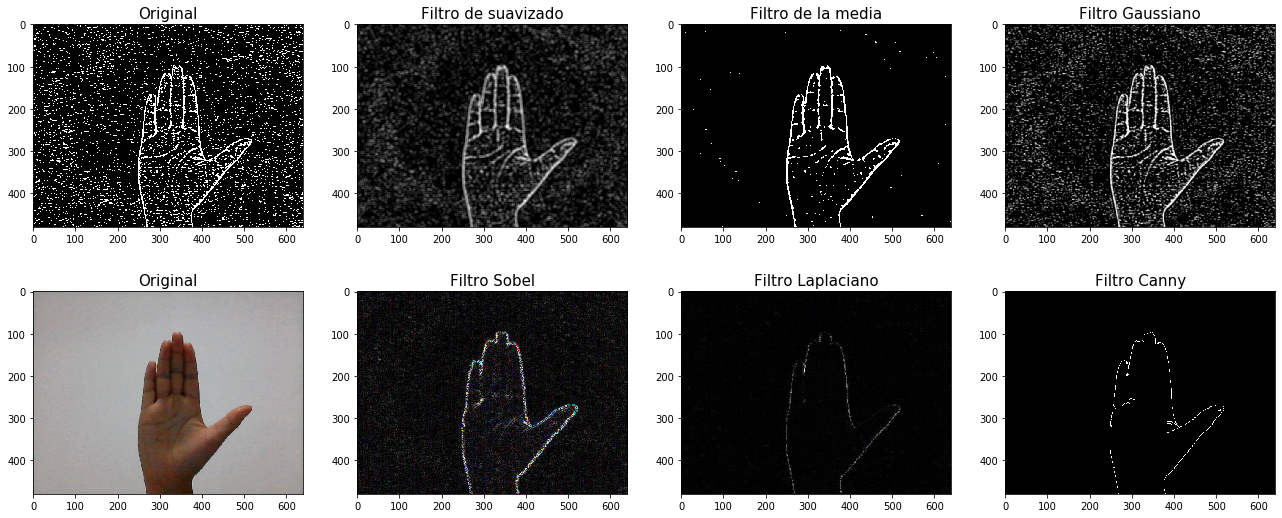

In [395]:
Kernel1 = np.ones((5, 5)) / 25
kernel2 = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
FLin1= cv2.filter2D(th0Inv, -1,Kernel2)
FLin2= cv2.filter2D(thAdBiMean11, -1,Kernel2)
# Suavizado
Blur1=cv2.blur(thAdBiGauss3,(7,7))
Blur2=cv2.medianBlur(thAdBiGauss3,5)
Blur3=cv2.GaussianBlur(thAdBiGauss3, (7,7), 0.95, 0.95)
# Sobel
sobelx64f = cv2.Sobel(imgRGB,cv2.CV_64F,1,1,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel = np.uint8(abs_sobel64f)
# Laplaciano
Laplacex64=cv2.Laplacian(imgRGB, cv2.CV_64F);
abs_Laplace64f = np.absolute(Laplacex64)
Laplace = np.uint8(abs_Laplace64f)
#Canny
Canny=cv2.Canny(imgRGB,50, 255);

plt.figure(1)
plt.subplot(2,4,1),plt.imshow(thAdBiGauss3, cmap='gray'), plt.title('Original',fontsize=15);
plt.subplot(2,4,2),plt.imshow(Blur1, cmap='gray'), plt.title('Filtro de suavizado',fontsize=15);
plt.subplot(2,4,3),plt.imshow(Blur2, cmap='gray'), plt.title('Filtro de la media',fontsize=15);
plt.subplot(2,4,4),plt.imshow(Blur3, cmap='gray'), plt.title('Filtro Gaussiano',fontsize=15);
plt.subplot(2,4,5),plt.imshow(imgRGB, cmap='gray'), plt.title('Original',fontsize=15);
plt.subplot(2,4,6),plt.imshow(sobel,cmap = 'gray'), plt.title('Filtro Sobel',fontsize=15);
plt.subplot(2,4,7),plt.imshow(Laplace, cmap='gray'), plt.title('Filtro Laplaciano',fontsize=15);
plt.subplot(2,4,8),plt.imshow(Canny, cmap='gray'), plt.title('Filtro Canny',fontsize=15);
plt.subplots_adjust(left = 0.125, right = 3 ,  bottom = 0.1, top = 1.8, wspace = 0.2, hspace = 0.2 )

##### * Aunque el filtro de suavizado mas básico elimina el ruido, disminuye también la calidad de los contornos de la figura, la efectividad aumenta notablemente al aplicar un filtro de media, eliminando gran parte de los componentes de ruido y manteniendo la calidad de los contornos.



# Filtro Prewitt

In [21]:
kernelN=np.array([[-1, -1, -1], [1, -2, 1], [1, 1, 1]])
kernelS=np.array([[1, 1, 1], [1, -2, 1], [-1, -1, -1]])
kernelE=np.array([[1, 1, -1], [1, -2, -1], [1, 1, -1]])
kernelO=np.array([[-1, 1, 1], [-1, -2, 1], [-1, 1, 1]])
kernelSO=np.array([[1, 1, 1], [-1, -2, 1], [-1, -1, 1]])
kernelNO=np.array([[-1, -1, 1], [-1, -2, 1], [1, 1, 1]])
kernelSE=np.array([[1, 1, 1], [1, -2, -1], [1, -1, -1]])
kernelNE=np.array([[1, -1, -1], [1, -2, -1], [1, 1, 1]])

<Figure size 432x288 with 0 Axes>

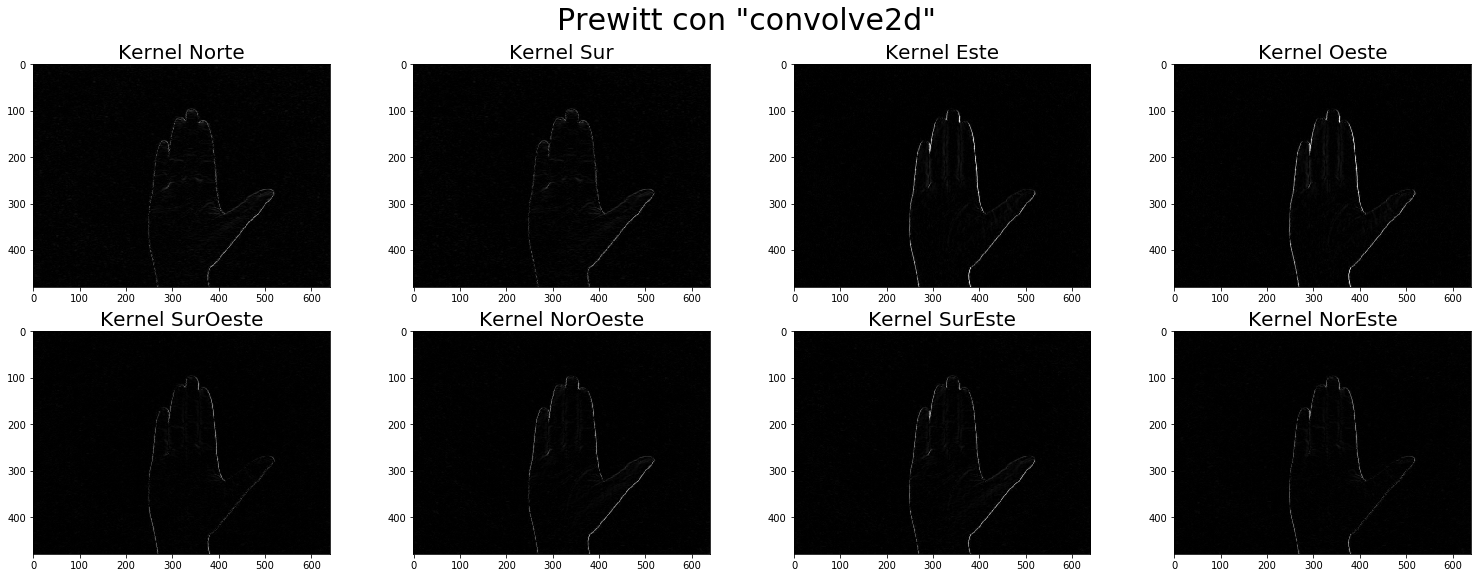

In [22]:
sal1 = abs(conv2(img, kernelN, 'same'))
sal2 = abs(conv2(img, kernelS, 'same'))
sal3 = abs(conv2(img, kernelE, 'same'))
sal4 = abs(conv2(img, kernelO, 'same'))
sal5 = abs(conv2(img, kernelSO, 'same'))
sal6 = abs(conv2(img, kernelNO, 'same'))
sal7 = abs(conv2(img, kernelSE, 'same'))
sal8 = abs(conv2(img, kernelNE, 'same'))
plt.figure(1)
fig, ax = plt.subplots();
fig.suptitle('Prewitt con "convolve2d"' , fontsize=30, x=1.8, y=2.2);
plt.subplot(2,4,1),plt.imshow(sal1,cmap = 'gray'), plt.title('Kernel Norte',fontsize=20)
plt.subplot(2,4,2),plt.imshow(sal2,cmap = 'gray'), plt.title('Kernel Sur',fontsize=20)
plt.subplot(2,4,3),plt.imshow(sal3,cmap = 'gray'), plt.title('Kernel Este',fontsize=20)
plt.subplot(2,4,4),plt.imshow(sal4,cmap = 'gray'), plt.title('Kernel Oeste',fontsize=20)
plt.subplot(2,4,5),plt.imshow(sal5,cmap = 'gray'), plt.title('Kernel SurOeste',fontsize=20)
plt.subplot(2,4,6),plt.imshow(sal6,cmap = 'gray'), plt.title('Kernel NorOeste',fontsize=20)
plt.subplot(2,4,7),plt.imshow(sal7,cmap = 'gray'), plt.title('Kernel SurEste',fontsize=20)
plt.subplot(2,4,8),plt.imshow(sal8,cmap = 'gray'), plt.title('Kernel NorEste',fontsize=20)
plt.subplots_adjust(left = 0.125, right = 3.5 ,  bottom = 0.3, top =2 , wspace = 0.2, hspace = 0.2 )

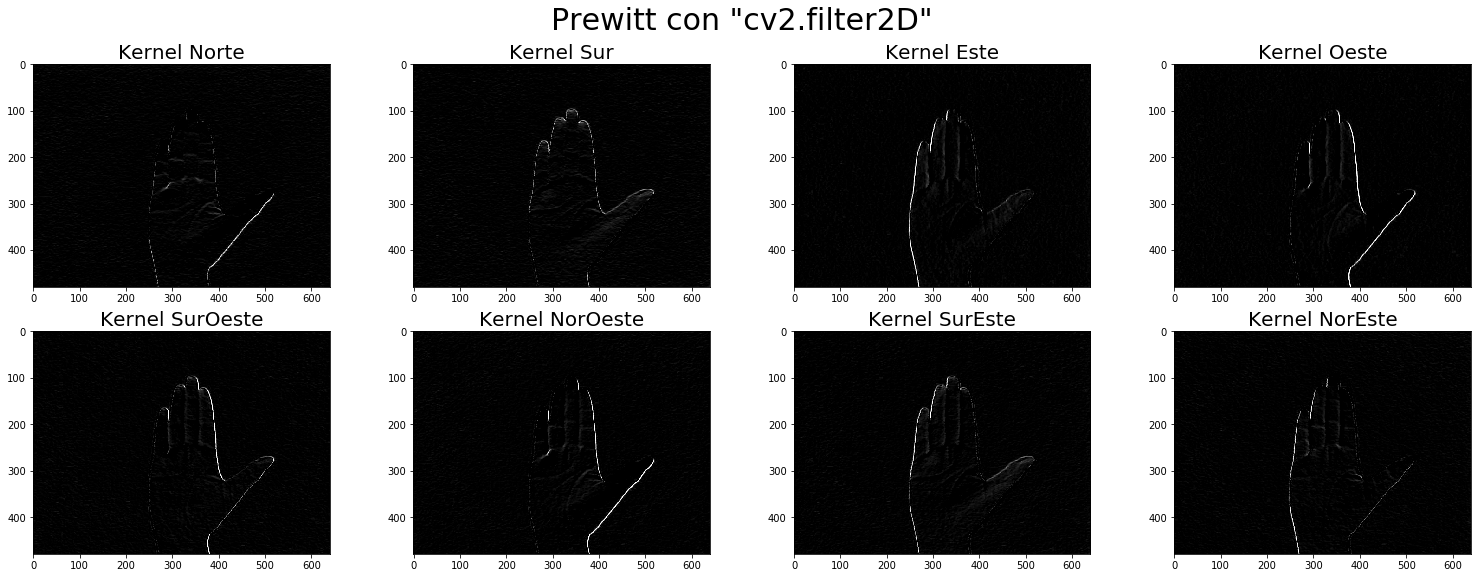

In [23]:
prewittN = cv2.filter2D(img, -1, kernelN)
prewittS = cv2.filter2D(img, -1, kernelS)
prewittE = cv2.filter2D(img, -1, kernelE)
prewittO = cv2.filter2D(img, -1, kernelO)
prewittSO = cv2.filter2D(img, -1, kernelSO)
prewittNO = cv2.filter2D(img, -1, kernelNO)
prewittSE = cv2.filter2D(img, -1, kernelSE)
prewittNE = cv2.filter2D(img, -1, kernelNE)
fig, ax = plt.subplots();
fig.suptitle('Prewitt con "cv2.filter2D" ' , fontsize=30, x=1.8, y=2.2);
plt.subplot(2,4,1),plt.imshow(prewittN,cmap = 'gray'), plt.title('Kernel Norte',fontsize=20)
plt.subplot(2,4,2),plt.imshow(prewittS,cmap = 'gray'), plt.title('Kernel Sur',fontsize=20)
plt.subplot(2,4,3),plt.imshow(prewittE,cmap = 'gray'), plt.title('Kernel Este',fontsize=20)
plt.subplot(2,4,4),plt.imshow(prewittO,cmap = 'gray'), plt.title('Kernel Oeste',fontsize=20)
plt.subplot(2,4,5),plt.imshow(prewittSO,cmap = 'gray'), plt.title('Kernel SurOeste',fontsize=20)
plt.subplot(2,4,6),plt.imshow(prewittNO,cmap = 'gray'), plt.title('Kernel NorOeste',fontsize=20)
plt.subplot(2,4,7),plt.imshow(prewittSE,cmap = 'gray'), plt.title('Kernel SurEste',fontsize=20)
plt.subplot(2,4,8),plt.imshow(prewittNE,cmap = 'gray'), plt.title('Kernel NorEste',fontsize=20)
plt.subplots_adjust(left = 0.125, right = 3.5 ,  bottom = 0.3, top =2 , wspace = 0.2, hspace = 0.2 )

<Figure size 432x288 with 0 Axes>

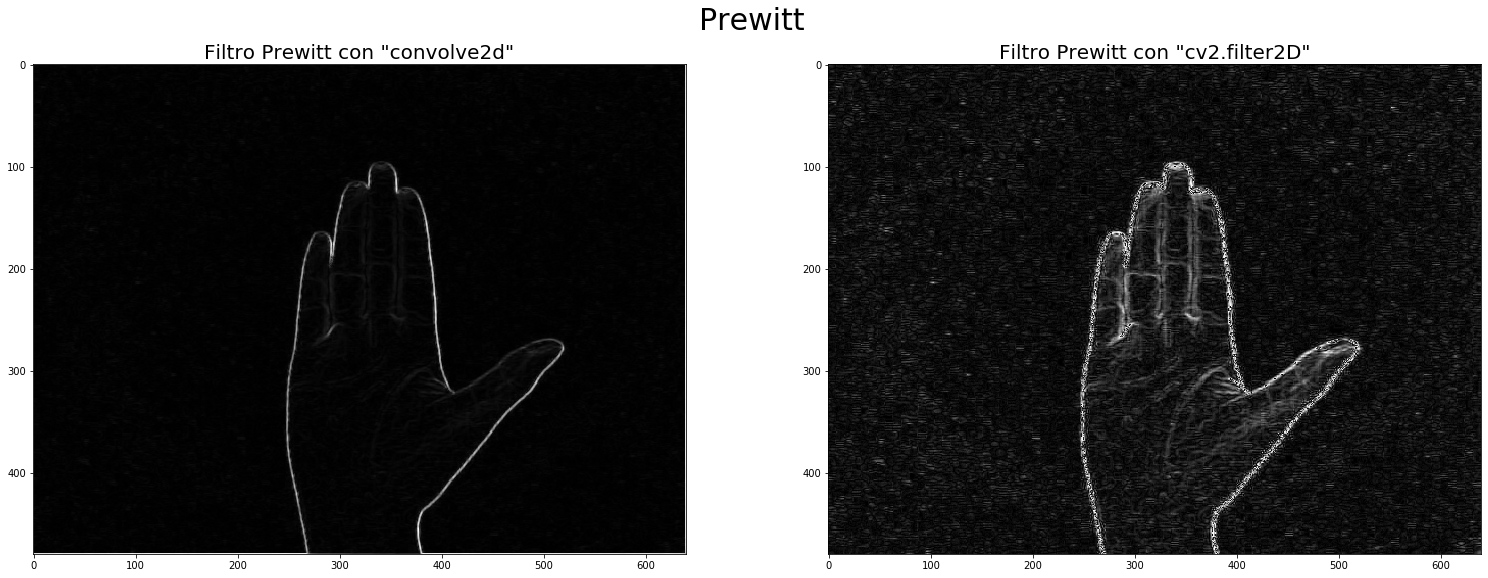

In [24]:
Prewitt1 = sal1+sal2+sal3+sal4+sal5+sal6+sal7+sal8;
Prewitt2 =prewittN+prewittS+prewittE+prewittO+prewittSO+prewittNO+prewittSE+prewittNE;
Prewitt3 = ndimage.prewitt(img,mode='wrap')
plt.figure(2)
fig, ax = plt.subplots();
fig.suptitle('Prewitt' , fontsize=30, x=1.8, y=2.2);
plt.subplot(1,2,1),plt.imshow(Prewitt1,cmap = 'gray'), plt.title('Filtro Prewitt con "convolve2d"',fontsize=20)
plt.subplot(1,2,2),plt.imshow(Prewitt2,cmap = 'gray'), plt.title('Filtro Prewitt con "cv2.filter2D"',fontsize=20)
plt.subplots_adjust(left = 0.125, right = 3.5 ,  bottom = 0.3, top =2 , wspace = 0.2, hspace = 0.2 )

En la comparación del filtro prewitt desarrollado mediante dos funciones diferentes vemos que a pesar de que la implementación de la función cv2.filter2D parece dar una mejor definición de los ocho bordes al aplicar los kernels individualmente en las respectivas direcciones, la suma de las imágenes arroja un resultado con alta presencia de ruido, en contraste con la calidad del resultado obtenido al aplicar la función convolve2d. Se concluye que, a menos que se aplique un filtro adicional adecuado a la imagen obtenida con la función c2v.filter2D, es preferible aplicar en este caso la convolución.


